In [28]:
# The following code will only execute
# successfully when compression is complete

import kagglehub

# Download latest version
path = kagglehub.dataset_download("ardhanazmi/image-classification-balance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/image-classification-balance


In [29]:
import os

data_dir = path

# Membaca jumlah file (foto) per folder (label)
label_counts = {
    label: len([
        f for f in os.listdir(os.path.join(data_dir, label)) 
        if os.path.isfile(os.path.join(data_dir, label, f))
    ])
    for label in os.listdir(data_dir)
    if os.path.isdir(os.path.join(data_dir, label))
}

# Tampilkan hasilnya
for label, count in label_counts.items():
    print(f"Label '{label}': {count} gambar")

Label 'Smoke': 2372 gambar
Label 'Fire': 2372 gambar
Label 'None': 2372 gambar
Label 'Smoke and Fire': 2372 gambar


In [30]:
import os
import glob
import shutil
from sklearn.model_selection import train_test_split

# Total data 
total_data = 9488

# Definisikan skenario pembagian dataset
# Format: scenario_number: test_size
test_sizes = {
    1: 0.2,  # 80% train, 10% val (dari train), 20% test
    2: 0.3,  # 70% train, 10% val (dari train), 30% test
    3: 0.4   # 60% train, 10% val (dari train), 40% test
}

# Proporsi validasi adalah 10% dari data latih (yang tersisa setelah test dipisah)
val_ratio_from_train = 0.1

# Path dataset awal (folder berisi subfolder kelas)
all_class_paths = glob.glob("/kaggle/input/image-classification-balance/*")

for scenario, test_size in test_sizes.items():
    print(f"\n=== Memproses Skenario {scenario} ===")
    scenario_folder = f"dataset/new/scenario_{scenario}"
    
    # Bersihkan folder skenario jika sudah ada (opsional, bisa diaktifkan jika ingin overwrite)
    # import shutil
    # if os.path.exists(scenario_folder):
    #     shutil.rmtree(scenario_folder)
    
    for class_path in all_class_paths:
        class_name = os.path.basename(class_path)
        images = glob.glob(f"{class_path}/*")
        
        # Pisahkan test set
        train_val_imgs, test_imgs = train_test_split(images, test_size=test_size, random_state=42)
        
        # Pisahkan train dan val dari train_val_imgs
        train_imgs, val_imgs = train_test_split(train_val_imgs, test_size=val_ratio_from_train, random_state=42)
        
        # Salin gambar ke folder training
        for img_path in train_imgs:
            dest = os.path.join(scenario_folder, "train", class_name)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(img_path, dest)
            
        # Salin gambar ke folder validasi
        for img_path in val_imgs:
            dest = os.path.join(scenario_folder, "val", class_name)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(img_path, dest)
            
        # Salin gambar ke folder testing
        for img_path in test_imgs:
            dest = os.path.join(scenario_folder, "test", class_name)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(img_path, dest)
        
        # Tampilkan ringkasan per kelas (opsional, bisa dihilangkan jika terlalu banyak output)
        print(f"Kelas '{class_name}': Train={len(train_imgs)}, Val={len(val_imgs)}, Test={len(test_imgs)}")
    
    # Hitung proporsi total per subset (sama untuk semua kelas)
    train_prop = round((1 - test_size) * (1 - val_ratio_from_train) * 100)
    val_prop = round((1 - test_size) * val_ratio_from_train * 100)
    test_prop = round(test_size * 100)
    
    print(f"\nSkenario {scenario} selesai:")
    print(f"Training: proporsi {train_prop}%")
    print(f"Validasi: proporsi {val_prop}%")
    print(f"Testing: proporsi {test_prop}%")



=== Memproses Skenario 1 ===
Kelas 'Smoke': Train=1707, Val=190, Test=475
Kelas 'Fire': Train=1707, Val=190, Test=475
Kelas 'None': Train=1707, Val=190, Test=475
Kelas 'Smoke and Fire': Train=1707, Val=190, Test=475

Skenario 1 selesai:
Training: proporsi 72%
Validasi: proporsi 8%
Testing: proporsi 20%

=== Memproses Skenario 2 ===
Kelas 'Smoke': Train=1494, Val=166, Test=712
Kelas 'Fire': Train=1494, Val=166, Test=712
Kelas 'None': Train=1494, Val=166, Test=712
Kelas 'Smoke and Fire': Train=1494, Val=166, Test=712

Skenario 2 selesai:
Training: proporsi 63%
Validasi: proporsi 7%
Testing: proporsi 30%

=== Memproses Skenario 3 ===
Kelas 'Smoke': Train=1280, Val=143, Test=949
Kelas 'Fire': Train=1280, Val=143, Test=949
Kelas 'None': Train=1280, Val=143, Test=949
Kelas 'Smoke and Fire': Train=1280, Val=143, Test=949

Skenario 3 selesai:
Training: proporsi 54%
Validasi: proporsi 6%
Testing: proporsi 40%


# Skenario 1
batch_size = 32 target_size = 300x300

In [31]:
import os

def get_num_classes(dataset_path):
    """
    Menghitung jumlah kelas berdasarkan folder di dalam dataset_path.
    
    Args:
        dataset_path (str): Path ke folder dataset utama yang berisi subfolder kelas.
        
    Returns:
        int: Jumlah kelas (jumlah subfolder).
    """
    # List semua folder di dalam dataset_path
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    num_classes = len(classes)
    print(f"Jumlah kelas ditemukan: {num_classes} kelas -> {classes}")
    return num_classes


base_dataset_path = "dataset/new/scenario_3/train"  # Contoh path ke folder training skenario 1
num_classes = get_num_classes(base_dataset_path)

Jumlah kelas ditemukan: 4 kelas -> ['Fire', 'None', 'Smoke and Fire', 'Smoke']


In [32]:
!nvidia-smi

Tue Aug  5 19:31:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   70C    P0             32W /   70W |     499MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [33]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE

ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/image-classification-balance",
    labels='inferred',  # pastikan ini eksplisit
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

ds = ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

Found 9488 files belonging to 4 classes.


In [34]:
import tensorflow as tf

def create_dataset(directory, img_size=(224, 224), batch_size=32, augment=False, shuffle=True):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        label_mode='categorical',
        image_size=img_size,
        batch_size=batch_size,
        shuffle=shuffle
    )
    
    if augment:
        ds = ds.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)

    ds = ds.cache().prefetch(tf.data.AUTOTUNE)
    return ds


def augment_images(images, labels):
    # Flip horizontal
    images = tf.image.random_flip_left_right(images)
    # Random brightness
    images = tf.image.random_brightness(images, 0.1)

    # Simulasi random zoom-in dengan random crop lalu resize kembali
    def random_zoom(image):
        zoom_ratio = tf.random.uniform([], 0.9, 1.0)
        shape = tf.shape(image)[0:2]
        shape = tf.cast(shape, dtype=tf.float32)
        crop_size = tf.cast(zoom_ratio * shape, dtype=tf.int32)
        image = tf.image.random_crop(image, size=[crop_size[0], crop_size[1], 3])
        image = tf.image.resize(image, [224, 224])
        return image

    images = tf.map_fn(random_zoom, images)
    return images, labels


In [35]:
def load_all_datasets(base_dir="dataset/new", batch_size=32):
    scenarios = ['scenario_1', 'scenario_2', 'scenario_3']
    datasets = {}

    for scenario in scenarios:
        train_dir = f"{base_dir}/{scenario}/train"
        val_dir   = f"{base_dir}/{scenario}/val"
        test_dir  = f"{base_dir}/{scenario}/test"

        train_ds = create_dataset(train_dir, batch_size=batch_size, augment=True)
        val_ds   = create_dataset(val_dir, batch_size=batch_size, augment=False, shuffle=False)
        test_ds  = create_dataset(test_dir, batch_size=batch_size, augment=False, shuffle=False)

        datasets[scenario] = (train_ds, val_ds, test_ds)

    return datasets


In [36]:
import os
import time
import tensorflow as tf
import pandas as pd
from tensorflow.keras import mixed_precision, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from collections import Counter
import numpy as np

# Set seed
SEED = 42
tf.random.set_seed(SEED)

# Mixed Precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
print(f"✅ Mixed precision policy aktif: {policy}")

# GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ Memory growth diaktifkan untuk {len(gpus)} GPU")
    except RuntimeError as e:
        print(e)

# Augmentasi Pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
], name="data_augmentation")

# Dataset loader
def create_dataset(directory, img_size=(224, 224), batch_size=32, augment=False, shuffle=True):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        label_mode='categorical',
        image_size=img_size,
        batch_size=batch_size,
        shuffle=shuffle,
        seed=SEED
    )
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
    return ds.cache().prefetch(tf.data.AUTOTUNE)

# Load semua skenario
def load_all_datasets(base_dir, batch_size=32):
    scenarios = ['scenario_1', 'scenario_2', 'scenario_3']
    all_data = {}
    for scenario in scenarios:
        train_ds = create_dataset(os.path.join(base_dir, scenario, 'train'), batch_size=batch_size, augment=True)
        val_ds   = create_dataset(os.path.join(base_dir, scenario, 'val'), batch_size=batch_size)
        test_ds  = create_dataset(os.path.join(base_dir, scenario, 'test'), batch_size=batch_size, shuffle=False)
        all_data[scenario] = (train_ds, val_ds, test_ds)
    return all_data


# Bangun model
def create_model_mobilenetv3(input_shape=(224, 224, 3), num_classes=4, dropout_rate=0.4, learning_rate=0.001):
    base_model = MobileNetV3Large(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = True
    for layer in base_model.layers[:-30]:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = BatchNormalization()(x)
    predictions = Dense(num_classes, activation='softmax',
                        kernel_regularizer=regularizers.l2(1e-4),
                        dtype='float32')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                  metrics=['accuracy'])

    return model, base_model

# Fungsi training utama
def train_models_for_all_scenarios(base_dataset_path="dataset/new", epochs=10, default_batch_size=32):
    scenarios = ['scenario_1', 'scenario_2', 'scenario_3']
    learning_rates = [0.001, 0.0001]
    results = []
    history_list = []

    for scenario_idx, scenario in enumerate(scenarios, start=1):
        for lr_idx, lr in enumerate(learning_rates, start=1):
            # 🔀 Tentukan batch size sesuai learning rate
            current_batch_size = 16 if lr == 0.0001 else default_batch_size
            print(f"\n🚀 Training untuk {scenario} | LR={lr} | Batch Size={current_batch_size} | Epochs={epochs}")

            # 🔄 Load dataset dengan batch size sesuai
            train_ds = create_dataset(os.path.join(base_dataset_path, scenario, 'train'),
                                      batch_size=current_batch_size, augment=True)
            val_ds = create_dataset(os.path.join(base_dataset_path, scenario, 'val'),
                                    batch_size=current_batch_size)
            test_ds = create_dataset(os.path.join(base_dataset_path, scenario, 'test'),
                                     batch_size=current_batch_size, shuffle=False)

            # 🔍 Ambil input shape dan jumlah kelas
            for batch_images, batch_labels in train_ds.take(1):
                input_shape = batch_images.shape[1:]
                num_classes = batch_labels.shape[-1]

            # 🔨 Bangun model
            model, base_model = create_model_mobilenetv3(
                input_shape=input_shape,
                num_classes=num_classes,
                learning_rate=lr
            )

            # 🕒 Waktu mulai training
            start_time = time.time()

            model_path = f"best_{scenario}_lr{lr_idx}.keras"
            checkpoint_cb = ModelCheckpoint(
                filepath=model_path,
                monitor="val_loss",
                save_best_only=True,
                verbose=1
            )

            # 🚀 Training tahap pertama
            history = model.fit(
                train_ds,
                validation_data=val_ds,
                epochs=epochs,
                verbose=1,
                callbacks=[
                    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
                    checkpoint_cb
                ],
            )

            # 🔧 Fine-tuning tahap kedua
            base_model.trainable = True
            for layer in base_model.layers[:-int(len(base_model.layers) * 0.3)]:
                layer.trainable = False

            model.compile(optimizer=Adam(learning_rate=lr / 10),
                          loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                          metrics=['accuracy'])

            model.fit(
                train_ds,
                validation_data=val_ds,
                epochs=5,
                verbose=1,
                callbacks=[
                    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
                ],
            )

            # ⏱️ Hitung durasi dan evaluasi
            duration = time.time() - start_time
            test_loss, test_acc = model.evaluate(test_ds)

            print(f"✅ Test accuracy: {test_acc:.4f} | Durasi: {duration:.2f} detik")

            # 📊 Simpan history ke dataframe
            history_df = pd.DataFrame(history.history)
            history_df['epoch'] = range(1, len(history_df) + 1)
            history_df['scenario'] = scenario
            history_df['learning_rate'] = lr
            history_df['batch_size'] = current_batch_size
            history_list.append(history_df)

            results.append({
                'scenario': scenario,
                'learning_rate': lr,
                'batch_size': current_batch_size,
                'test_accuracy': test_acc,
                'training_time_sec': duration,
                'model_path': model_path
            })

    # 💾 Simpan history pelatihan
    all_history_df = pd.concat(history_list, ignore_index=True)
    all_history_df.to_csv("training_history.csv", index=False)

    # 📋 Ringkasan akhir
    print("\n📊 === Ringkasan Hasil Training ===")
    print(f"{'Scenario':<12} {'LR':<10} {'Batch':<8} {'Test Acc':<10} {'Train Time (s)':<15} {'Model Path'}")
    for r in results:
        print(f"{r['scenario']:<12} {r['learning_rate']:<10} {r['batch_size']:<8} {r['test_accuracy']:<10.4f} {r['training_time_sec']:<15.2f} {r['model_path']}")

# Eksekusi saat file dijalankan langsung
if __name__ == "__main__":
    train_models_for_all_scenarios(epochs=10, default_batch_size=32)

#def lr_schedule(epoch, lr):
 #   if epoch < 5:
  #      return lr * (epoch + 1) / 5
   # elif epoch > 20:
    #    return lr * tf.math.exp(-0.1 * (epoch - 20))
    #return lr

✅ Mixed precision policy aktif: <DTypePolicy "mixed_float16">
Physical devices cannot be modified after being initialized

🚀 Training untuk scenario_1 | LR=0.001 | Batch Size=32 | Epochs=10
Found 6828 files belonging to 4 classes.
Found 760 files belonging to 4 classes.
Found 1900 files belonging to 4 classes.
Epoch 1/10


I0000 00:00:1754422292.680810      87 service.cc:148] XLA service 0x21252e80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754422292.686030      87 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1754422292.686057      87 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  5/214 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3024 - loss: 1.9165   

I0000 00:00:1754422306.313105      87 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.7143 - loss: 0.9976
Epoch 1: val_loss improved from inf to 1.11819, saving model to best_scenario_1_lr1.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 101s 327ms/step - accuracy: 0.7146 - loss: 0.9968 - val_accuracy: 0.7197 - val_loss: 1.1182 - learning_rate: 0.0010
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8997 - loss: 0.5836
Epoch 2: val_loss improved from 1.11819 to 0.94755, saving model to best_scenario_1_lr1.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8999 - loss: 0.5834 - val_accuracy: 0.7461 - val_loss: 0.9475 - learning_rate: 0.0010
Epoch 3/10
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9677 - loss: 0.4769
Epoch 3: val_loss improved from 0.94755 to 0.81130, saving model to best_scenario_1_lr1.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9677 - loss: 0.4767 - val_accuracy: 0.8263 - val_loss: 0.8113 - learning_rate: 0.0010
Epoch 4/10
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


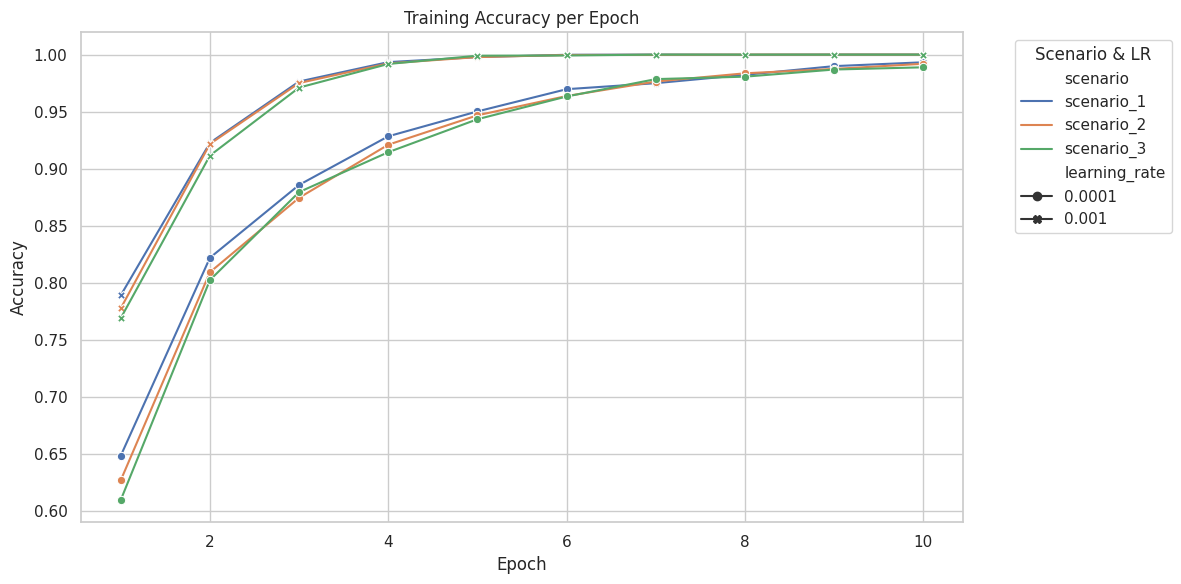

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


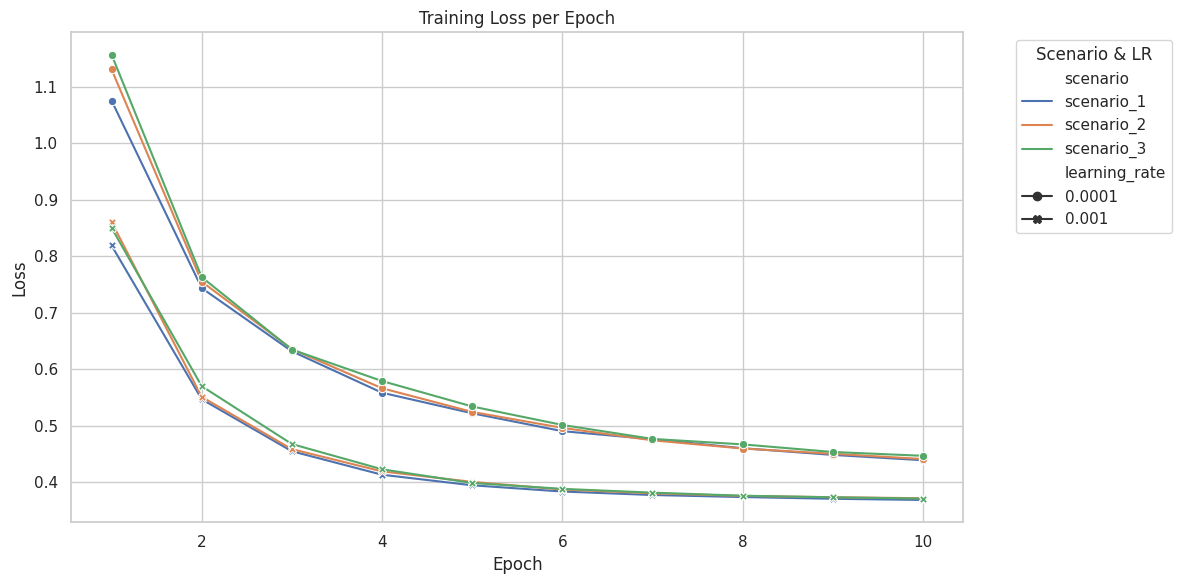

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load file hasil training
history_df = pd.read_csv("training_history.csv")

# Set style
sns.set(style="whitegrid")

# 🔹 Plot Accuracy per Epoch
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=history_df,
    x="epoch",
    y="accuracy",
    hue="scenario",
    style="learning_rate",
    markers=True,
    dashes=False
)
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(title="Scenario & LR", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("plot_accuracy_per_epoch.png")
plt.show()

# 🔹 Plot Loss per Epoch
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=history_df,
    x="epoch",
    y="loss",
    hue="scenario",
    style="learning_rate",
    markers=True,
    dashes=False
)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(title="Scenario & LR", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("plot_loss_per_epoch.png")
plt.show()


In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

# 🏷️ Label kelas
CLASS_NAMES = ['Fire', 'None', 'Smoke', 'Smoke and Fire']

# ✅ Custom casting (jika diperlukan)
def my_cast(x):
    return tf.cast(x, tf.float32)

# ✅ Load model
def load_custom_model(model_path):
    custom_objects = {'my_cast': my_cast}
    return load_model(model_path, custom_objects=custom_objects)

# ✅ Load dataset test
def load_test_dataset(test_dir, img_size=(224, 224), batch_size=32):
    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        test_dir,
        label_mode='categorical',
        image_size=img_size,
        shuffle=False,
        batch_size=batch_size
    )

    AUTOTUNE = tf.data.AUTOTUNE
    test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y), num_parallel_calls=AUTOTUNE)
    return test_ds.prefetch(buffer_size=AUTOTUNE)

# ✅ Evaluasi model
def evaluate_model(model_path, test_dir, scenario='scenario_x', lr_label='lrX'):
    print(f"🔍 Evaluasi model: {model_path}")
    model = load_custom_model(model_path)
    test_dataset = load_test_dataset(test_dir)

    y_true = []
    y_pred = []

    for batch_images, batch_labels in test_dataset:
        preds = model.predict(batch_images, verbose=0)
        y_true.extend(np.argmax(batch_labels.numpy(), axis=1))
        y_pred.extend(np.argmax(preds, axis=1))

    # ✅ Classification Report
    print("\n📊 Classification Report")
    print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

    # ✅ Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {scenario} ({lr_label})")

    # ✅ Simpan gambar matrix
    outname = f'confusion_matrix_{scenario}_{lr_label}.png'
    plt.savefig(outname)
    plt.close()
    print(f"📁 Saved confusion matrix to: {outname}")

# ✅ Contoh penggunaan
if __name__ == "__main__":
    model_path = "/kaggle/working/best_scenario_3_lr1.keras"
    test_dir = "/kaggle/working/dataset/new/scenario_3/test"

    evaluate_model(model_path, test_dir, scenario='scenario_3', lr_label='lr1')



🔍 Evaluasi model: /kaggle/working/best_scenario_3_lr1.keras
Found 3796 files belonging to 4 classes.

📊 Classification Report
                precision    recall  f1-score   support

          Fire       0.91      0.78      0.84       949
          None       0.99      0.97      0.98       949
         Smoke       0.96      0.94      0.95       949
Smoke and Fire       0.78      0.92      0.84       949

      accuracy                           0.90      3796
     macro avg       0.91      0.90      0.90      3796
  weighted avg       0.91      0.90      0.90      3796

📁 Saved confusion matrix to: confusion_matrix_scenario_3_lr1.png


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Muat hasil dari training
results_df = pd.DataFrame(results)
results_df.to_csv("training_results.csv", index=False)
print("✅ File training_results.csv berhasil disimpan!")


# Set gaya visualisasi
sns.set(style="whitegrid")

# 1. Grafik Akurasi Uji per Model
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="scenario", y="test_accuracy", hue="learning_rate", palette="viridis")
plt.title("📊 Test Accuracy per Skenario dan Learning Rate")
plt.ylabel("Akurasi Uji")
plt.ylim(0, 1)
plt.xlabel("Skenario")
plt.legend(title="Learning Rate")
plt.tight_layout()
plt.show()

# 2. Grafik Durasi Training
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="scenario", y="training_time_sec", hue="learning_rate", palette="magma")
plt.title("⏱️ Lama Training per Skenario dan Learning Rate")
plt.ylabel("Durasi (detik)")
plt.xlabel("Skenario")
plt.legend(title="Learning Rate")
plt.tight_layout()
plt.show()


NameError: name 'results' is not defined